In [67]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Building the data structure and operations needed to represent our neural network.
 
    - Create the class value that holds information needed in our neural network
    - Define some operations
    - Define how each operation can be backpropagated
    - Define a general call back for backpropagation

In [71]:
class Value:
    def __init__(self, data, _children=(), _op='', label='') -> None:
        self.data = data
        self.grad = 0.0 
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    def __add__(self,other):
        out = Value(self.data + other.data, (self,other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out
    def __mul__(self,other):
        out = Value(self.data * other.data, (self,other), '*')

        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data 
        out._backward = _backward

        return out
    def tanh(self):
        x = self.data
        tanh = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(tanh, (self, ), "tanh")

        def _backward():
            self.grad = (1 - tanh**2) * out.grad
        out._backward = _backward

        return out
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()         
        

    

#### Manual Back propagation on a nuron
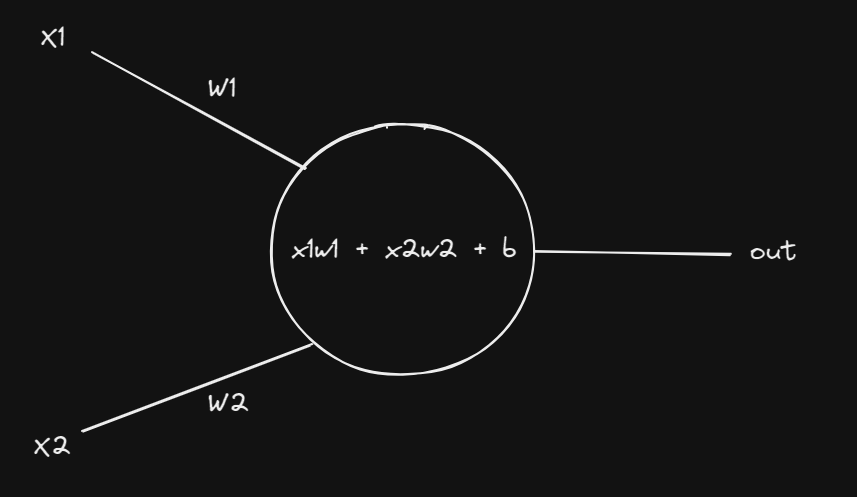

```python
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.7, label='b')
```

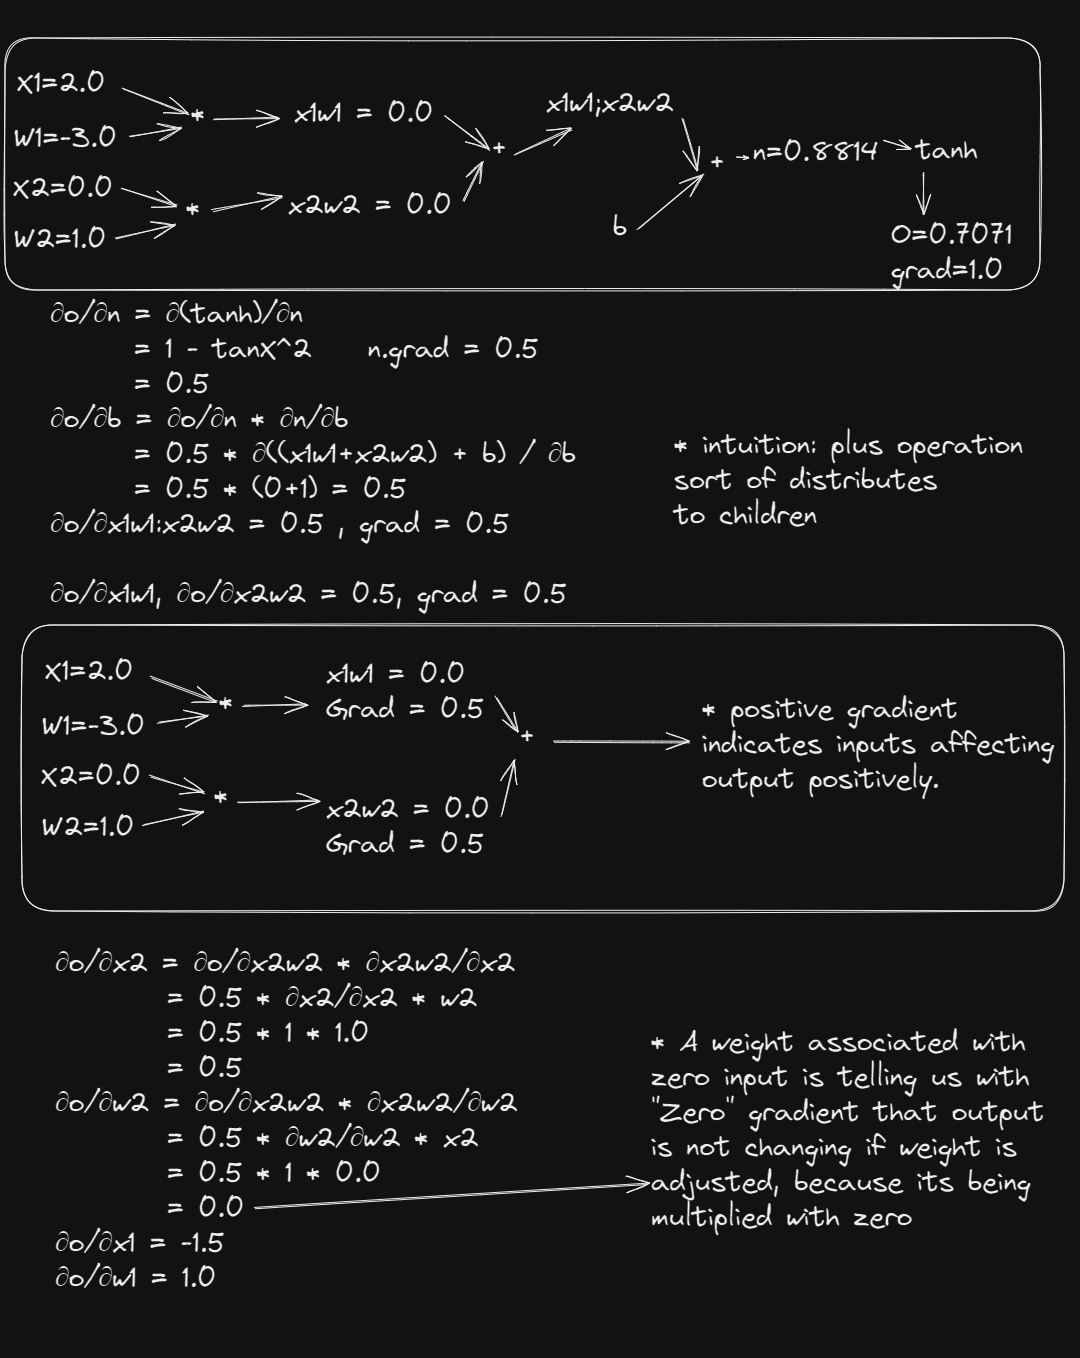

In [69]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1
x2w2 = x2*w2
x1w1x2w2 = x1w1 + x2w2 
n = x1w1x2w2 + b
o = n.tanh()


In [70]:
o.backward()
print(o.grad)
print(n.grad)
print(w1.grad)


1.0
0.4999999999999999
0.9999999999999998
